In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2015-01-01'
end = '2025-03-28'


stock = 'VBL.NS'
data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,VBL.NS,VBL.NS,VBL.NS,VBL.NS,VBL.NS
0,2016-11-08,24.897339,25.561087,22.586411,23.298924,305744118
1,2016-11-09,23.534626,24.382598,21.294136,21.294136,13691733
2,2016-11-10,23.642986,24.973192,23.475018,24.165857,7757505
3,2016-11-11,23.875980,24.382596,23.296215,23.515659,5469221
4,2016-11-15,23.737814,24.095426,23.298928,23.732395,6065128
...,...,...,...,...,...,...
2069,2025-03-21,537.950012,552.000000,533.000000,547.000000,10054240
2070,2025-03-24,531.099976,547.750000,529.650024,545.000000,5386711
2071,2025-03-25,517.150024,535.000000,511.649994,534.500000,6675687


In [7]:
movingAvg_100 = data.Close.rolling(100).mean()

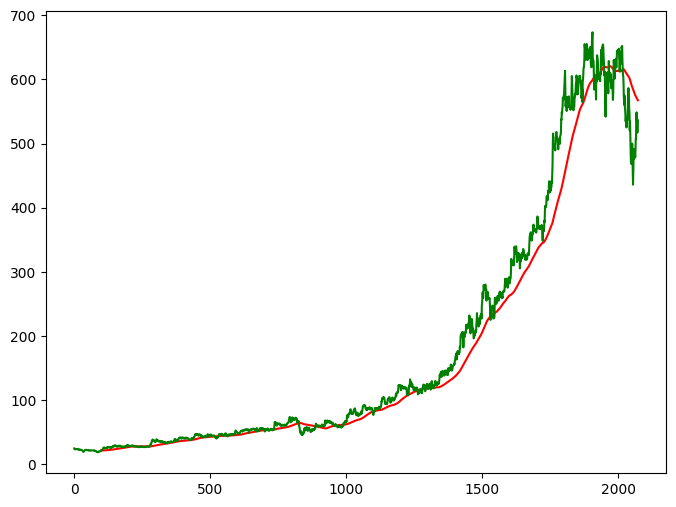

In [8]:
plt.figure(figsize=(8,6))
plt.plot(movingAvg_100, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
movingAvg_200 = data.Close.rolling(200).mean()

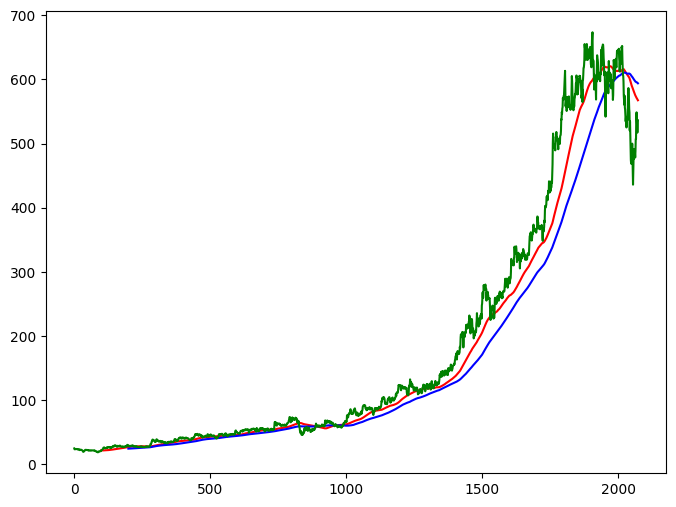

In [10]:
plt.figure(figsize=(8,6))
plt.plot(movingAvg_100, 'r')
plt.plot(movingAvg_200,'b')
plt.plot(data.Close,'g')
plt.show()

C:\Users\DHRUVIL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\DHRUVIL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - loss: 0.0660
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0202
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0070
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0050
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0037
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0041
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0098
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0048
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0059
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0046
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0045
Epoch 12/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0054
Epoch 13/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0047
Epoch 14/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0033
Epoch 15/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - l

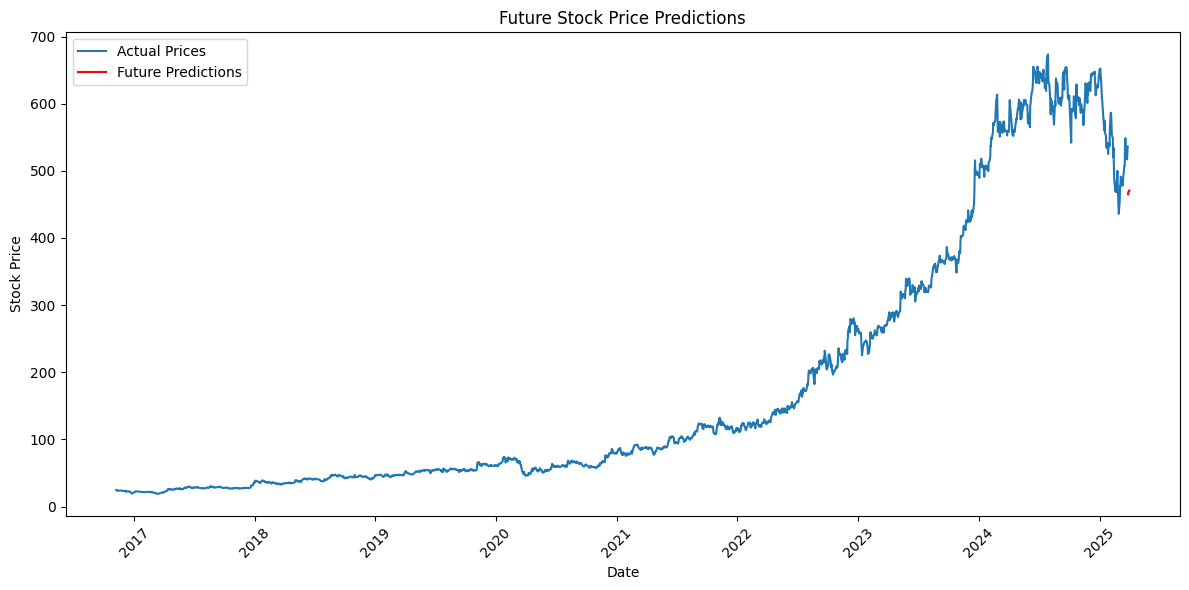

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Choose the column Close to predict the Values
prices = data['Close'].values.reshape(-1, 1)

# Find the mean of the closing price bet 0 and 1
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# Provide the seq length and batch size
sequence_length = 90  # Number of previous time steps to use for prediction
batch_size = 42

# TimeseriesGenerator creates the input output for the LSTM Model
generator = TimeseriesGenerator(prices_scaled, prices_scaled, length=sequence_length, batch_size=batch_size)
model = Sequential()

# There are Four layers for the LSTM Model 3 layers for Input Neurons and 1 layer is for Output
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1))

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

num_epochs = 30
model.fit(generator, epochs=num_epochs)

# Define the number of future days to predict
num_future_days = 5  # Change this to the desired number of days

# Initialize an array to store future predictions
future_predictions = []

# Take the last sequence of data as input for predicting the future
last_sequence = prices_scaled[-sequence_length:]

for _ in range(num_future_days):
    # Reshape and predict future prices
    future_prediction_scaled = model.predict(last_sequence.reshape(1, sequence_length,1))

    # Append the prediction to the list of future predictions
    future_predictions.append(future_prediction_scaled[0, 0])

    # Update the last_sequence for the next iteration
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = future_prediction_scaled

# Inverse transform to get future stock price predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))



# Generate future dates for plotting
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=num_future_days)

# Convert future_predictions array to a list
future_predictions_list = [prediction[0] for prediction in future_predictions]
print(future_predictions_list)
# Plot original prices and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(data['Date']), prices, label='Actual Prices')  # Ensure Date column is datetime
plt.plot(future_dates, future_predictions_list, color='red', label='Future Predictions')  # Use datetime for future dates
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





In [14]:
model.save('Stock Predictions Modified1 Model.keras')